In [1]:
### It's always a good idea when working in RStudio to start with a clean environment. 

### Clear objects from the environment memory that may be leftover from previous versions of your code or other assignments by running the following line:
rm(list = ls())

### Load the libraries you need

library(tidyverse) 
library(psych)
library(lm.beta)





### Load the Data
### Load the data file
### Do not change this line
brf <- read_csv("brfss2021.csv", show_col_types = FALSE)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




In [2]:
brf

_STATE,IMONTH,IDAY,IYEAR,DISPCODE,PVTRESD1,COLGHOUS,NUMADULT,NUMMEN,NUMWOMEN,⋯,SOFEMALE,TRNSGNDR,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_CHISPNC,CAGEG,_AGE_G
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01,19,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,1,9,NA,6
1,01,21,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,2,9,NA,6
1,01,21,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,1,9,NA,6
1,01,17,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,1,1,3,9,NA,5
1,01,15,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,2,1,2,9,NA,6
1,01,14,2021,1100,1,NA,1,NA,NA,⋯,NA,NA,10,1,2,2,5,9,NA,6
1,01,08,2021,1100,1,NA,2,1,1,⋯,NA,NA,10,1,2,1,5,9,NA,5
1,01,21,2021,1100,1,NA,1,NA,NA,⋯,NA,NA,10,1,1,1,3,9,NA,5
1,02,20,2021,1100,1,NA,1,NA,NA,⋯,NA,NA,10,1,1,1,1,9,NA,6


## Target and Feature Selection

In [5]:
final_project_df <- brf |>
  select(PHYSHLTH,SMOKDAY2,ALCDAY5,EXERANY2) |>
  filter(SMOKDAY2 %in% c(1,2,3)) |> #keeping smoking never,some, or everyday
  filter(EXERANY2 %in% c(1,2))|> # keeping yes or no to last 30 days of having exercise
  filter(PHYSHLTH != 77) |> #taking out don't know/not sure
  filter(PHYSHLTH != 99) |> #taking out refused to answer
  mutate(PHYSHLTH = if_else(PHYSHLTH == 88,0,PHYSHLTH)) |> #convert 88 to zero days
  as.data.frame()
 
final_project_df

PHYSHLTH,SMOKDAY2,ALCDAY5,EXERANY2
<dbl>,<dbl>,<dbl>,<dbl>
20,3,888,2
0,3,888,2
0,3,888,1
25,3,203,1
0,2,888,2
0,3,888,1
10,3,888,1
0,1,204,2
30,3,230,1


PHYSHLTH <- This will be the variable I will seek to predict from the other variables.
It is representative of the amount of days the person being interviewed felt their physical health was not good.
Responses include a number between 01-30 which reflects the amount of days that person felt their physical health was not good,
88 which reflects an amount of zero days feeling their physical health was not good, 77 for don’t know/not sure, and 99 for refusal of answer.
88 has to be updated to reflect 0, and 77 and 99 will be filtered out.

SMOKDAY2 <- This will be the first predictor used.
It is representative of how often a participant smokes.
Responses include 1 for smoking everyday, 2 for smoking some days, 3 for smoking never, 7 for don’t know/not sure, and 9 for refusal of answer.
7 and 9 will be filtered out.

ALCDAY5 <- This will be the second predictor used.
It is representative of how often a participant drinks.
The response can be reported in days per week or per month the participant drinks.
Responses starting with 1 _ _ reflect days per week, with the values after the one being the amount of days per week.
Responses starting with 2 _ _ reflect days per month, with the values after the two being the amount of days per month.
A response of 888 means no drinks within the past 30 days, 777 means not sure/don’t know, and 999 being a refusal of answer.
I plan to convert this variable going forward, which is where filtering will take place. 888 will be converted to 0 and 777/999 will be dropped.

EXERANY2 <- This will be the third predictor used.
It is representative of if a participant has had physical activity or exercised in the past 30 days or not(outside of work).
A response of 1 means they have, a response of 2 means no they have not, 7 means don’t know/ not sure, and 9 means refusal of answer. 
7 and 9 will are to be filtered out.

## Checking for outliers using boxplots for the first 3 variables

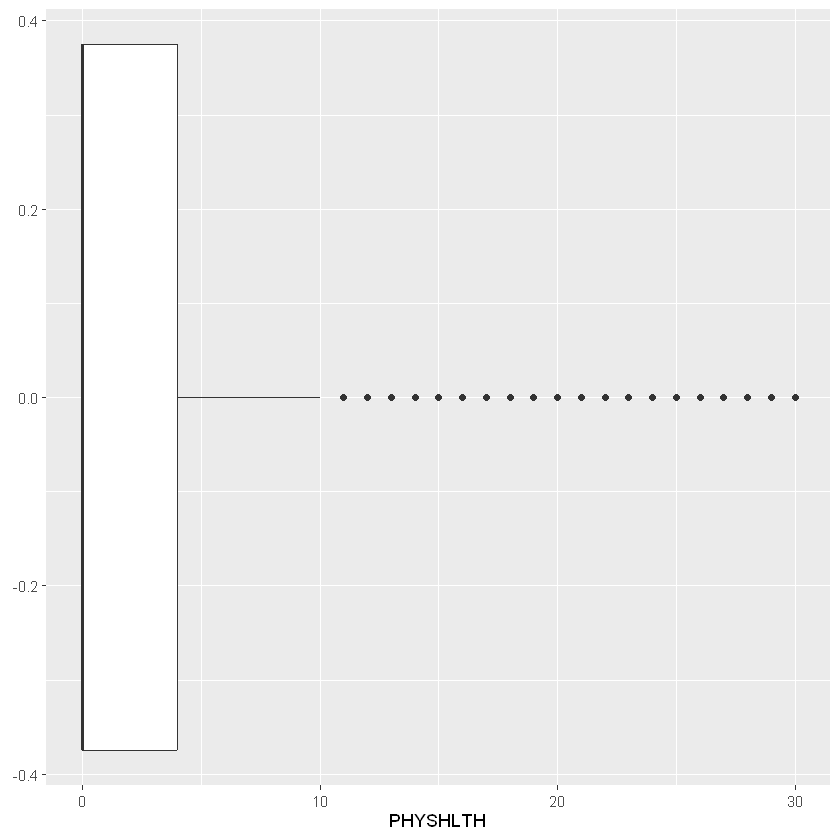

In [6]:
final_project_df |>
  ggplot(aes(x=PHYSHLTH)) +
  geom_boxplot()

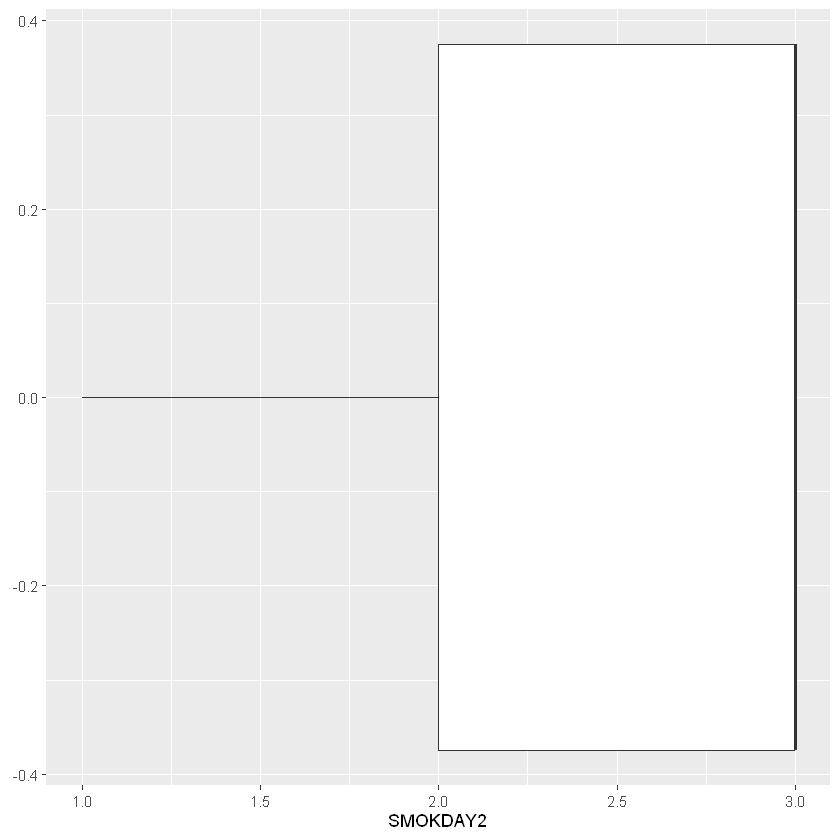

In [7]:
final_project_df |>
  ggplot(aes(x=SMOKDAY2)) +
  geom_boxplot()

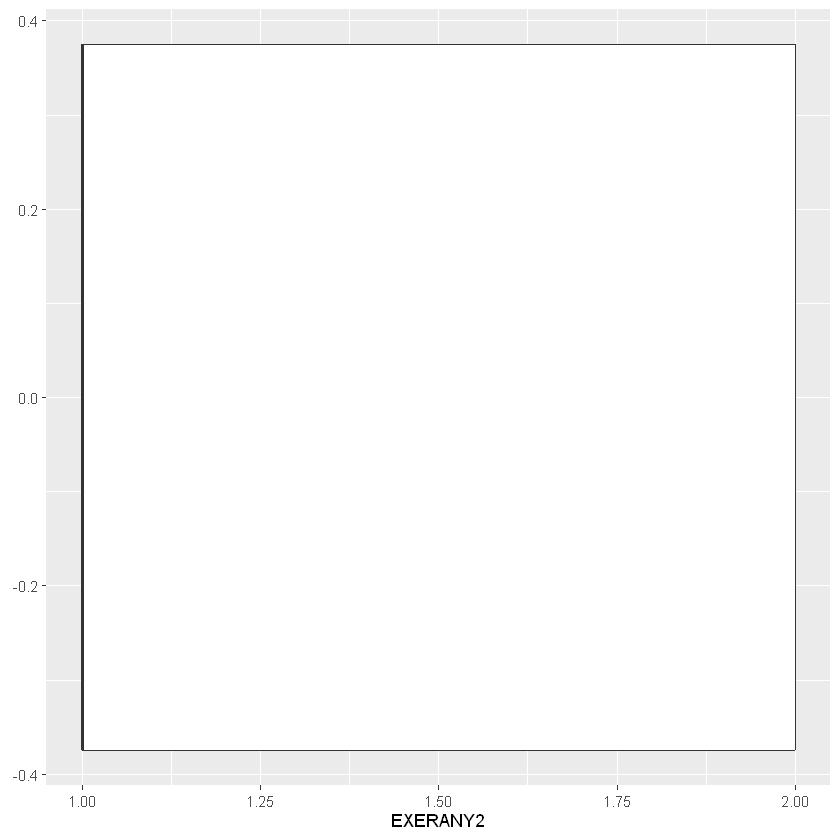

In [8]:
final_project_df |>
  ggplot(aes(x=EXERANY2)) +
  geom_boxplot()

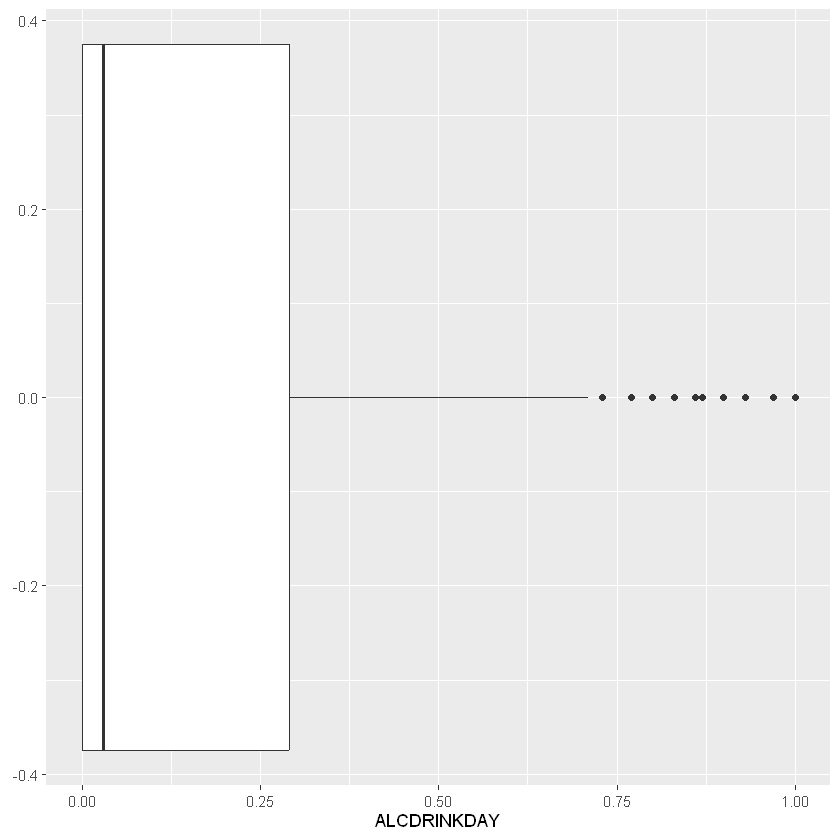

In [9]:
#converting drinks per week and month to per day, will use this column over alcday5 column
final_project_df <- final_project_df |>
  mutate(
    ALCDRINKDAY = case_when(
      between(ALCDAY5,101,107) ~ round((ALCDAY5-100)/7,2), #converting weeks to days
      between(ALCDAY5,201,230) ~ round((ALCDAY5-200)/30,2), #converting per month to days
      ALCDAY5 == 888 ~ 0, # converting no drinks to zero
    )) |>
  filter(!is.na(ALCDRINKDAY))|>
  as.data.frame()

#Since the alcday5 variable is not uniform in available responses that can be given, I broke down the responses for the per week and per month so that they could be converted per day. I also removed the NA's. 

#checking for outliers in the ALCDRINKDAY variable
final_project_df |>
  ggplot(aes(x=ALCDRINKDAY)) +
  geom_boxplot()

In [10]:
#Outliers were found in the alcdrinkday variable and the physhlth variable, the next few steps are removal

# creating the upper fence to take out outliers in alcdrinkday
upper_fence <- quantile(final_project_df$ALCDRINKDAY, 0.75) + (1.5 * IQR(final_project_df$ALCDRINKDAY))
lower_fence <- quantile(final_project_df$ALCDRINKDAY, 0.25) - (1.5 * IQR(final_project_df$ALCDRINKDAY))

# creating the upper fence to take out outliers in physhlth
upper_f <- quantile(final_project_df$PHYSHLTH, 0.75) + (1.5 * IQR(final_project_df$PHYSHLTH))
lower_f <- quantile(final_project_df$PHYSHLTH, 0.25) - (1.5 * IQR(final_project_df$PHYSHLTH))

#applying the created boundries to the dataframe to remove the outliers
final_project_df <- final_project_df |> 
  filter(
    ALCDRINKDAY >= lower_fence,
    ALCDRINKDAY <= upper_fence,
    PHYSHLTH >= lower_f,
    PHYSHLTH <= upper_f
  )
 

For this part of the project, I looked at the variables and if the contained outliers. I first checked for outliers in the PHYSHLTH, EXERANY2, and SMOKDAY2 variables and I determined the PHYSHLTH variable had outliers. For the ALCDAY5, I made a new column called ALCDRINKDAY in which I converted that data from drinks per week and per month to drinks per day, so that it would be uniform and overall make more sense, and I also removed the NAs. After looking at the boxplot I determined there were outliers and used the 1.5 IQR rule to remove outliers for both the physhlth and alcdrinkday columns. I choose this method mainly because it is the more widely used method and because I had used a boxplot to help determine outliers.

## Visual analysis of features

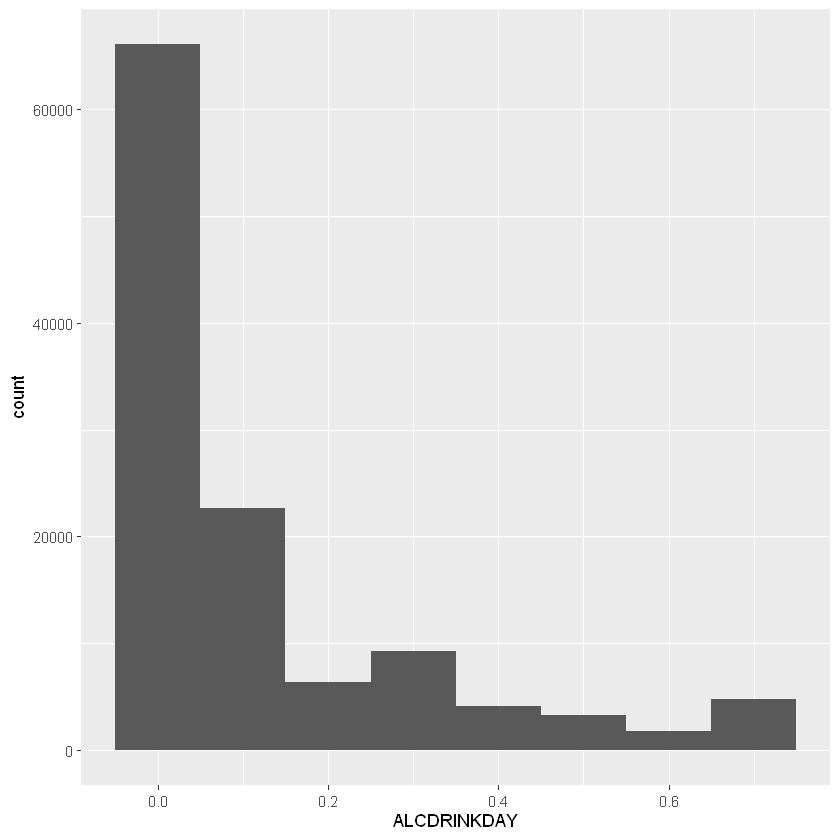

In [11]:
#NOTE : I will be using the AlCDRINKDAY data instead of the original ALCDAY5.

#seeing counts on alcoholic beverages per day
final_project_df |>
  ggplot(aes(x = ALCDRINKDAY)) +
  geom_histogram(binwidth = .1)

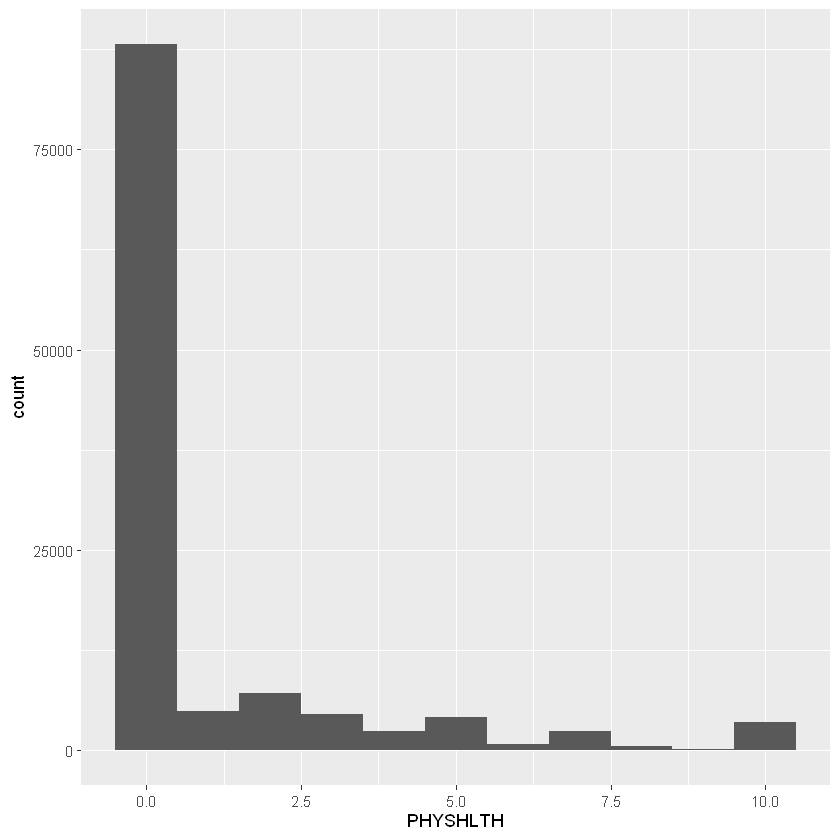

In [12]:
#seeing counts on amount of days a participant does not feel good
final_project_df |>
  ggplot(aes(x = PHYSHLTH)) +
  geom_histogram(binwidth = 1)

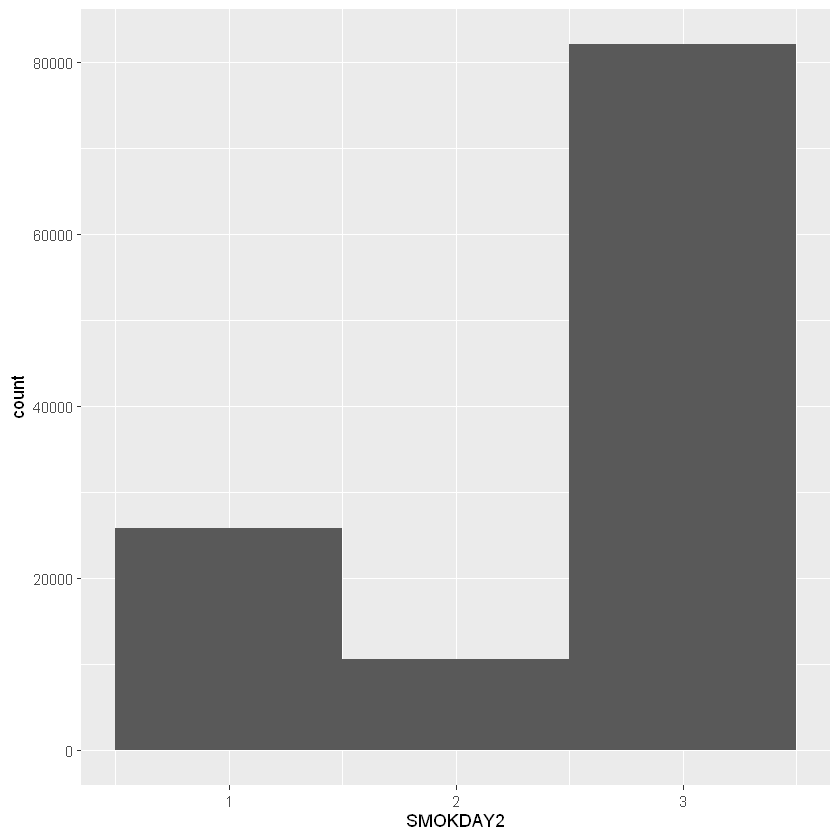

In [13]:
#seeing counts on smoking between everyday, some days, and never
final_project_df |>
  ggplot(aes(x = SMOKDAY2)) +
  geom_histogram(binwidth = 1)

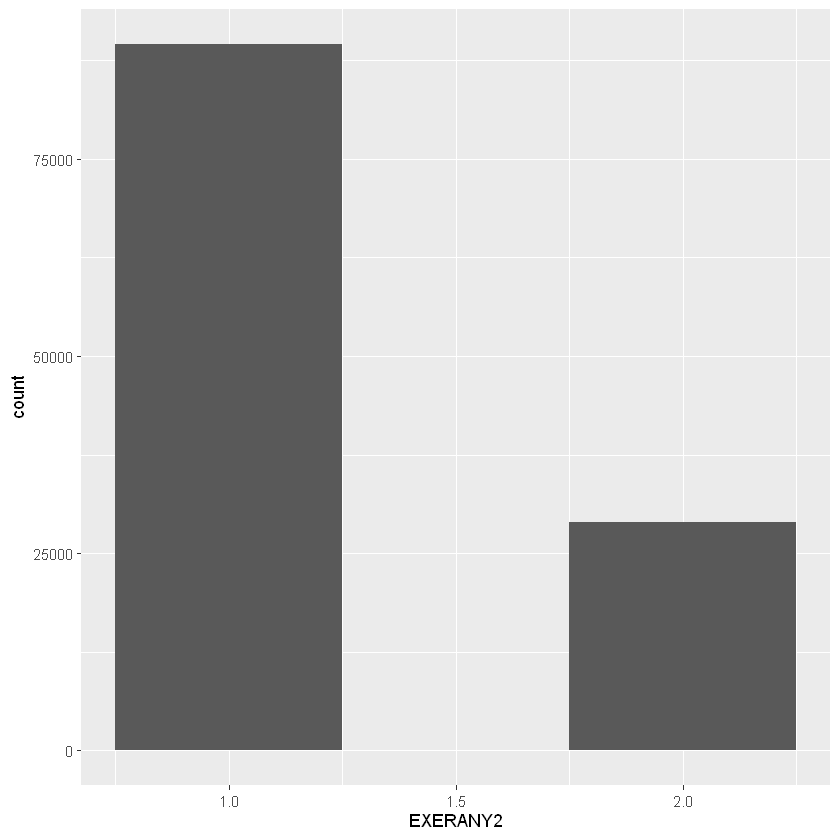

In [14]:
#counts of if people are exercising with the last 30 days
final_project_df |>
  ggplot(aes(x=EXERANY2)) +
  geom_histogram(binwidth = 0.5)

`geom_smooth()` using formula = 'y ~ x'


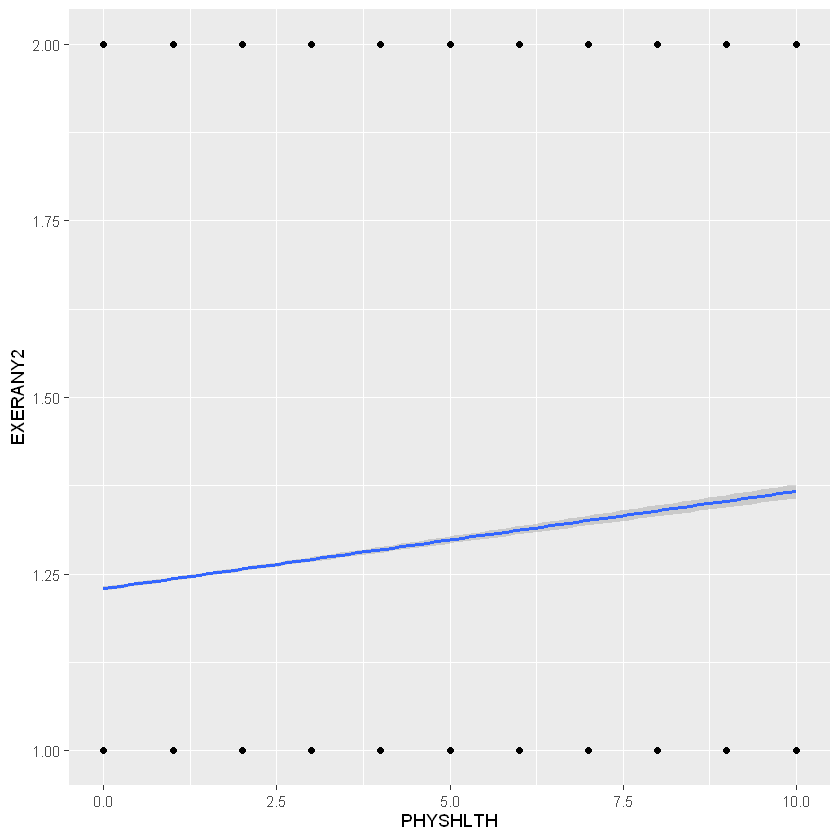

In [15]:
#scatterplot with a line of best fit for what I want to predict and what I expect to be the only variable that would have a positive relationship with it. 
final_project_df |>
  ggplot(aes(x=PHYSHLTH, y=EXERANY2)) +
  geom_point() + geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'


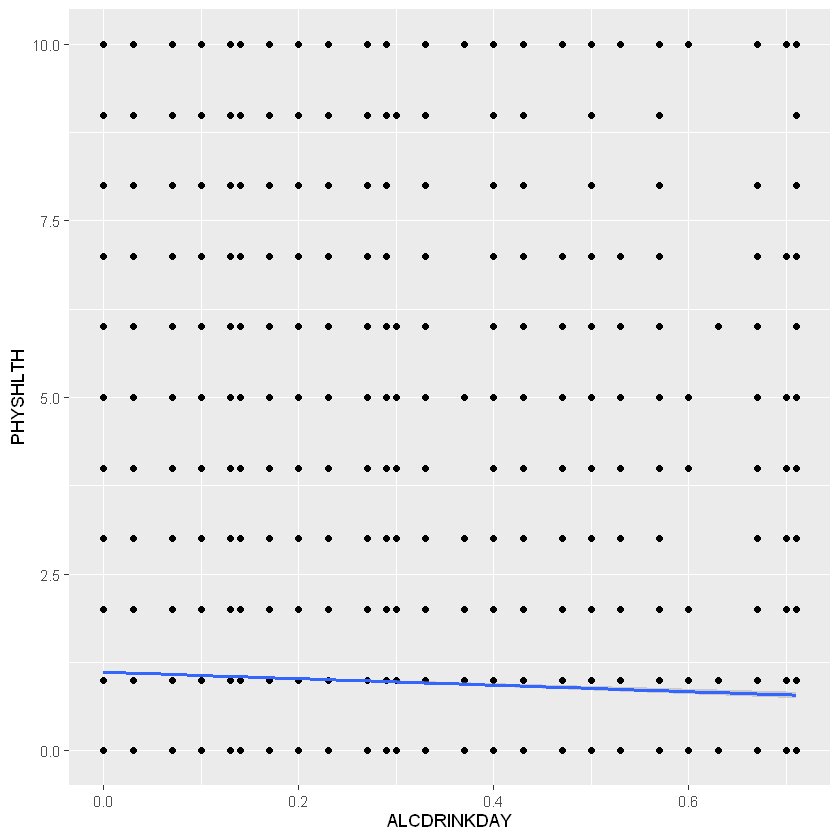

In [16]:
#scatterplots with a line of best fit for what I want to predict versus what I would expect to be the variables to have a negative relationship with it.
final_project_df |>
  ggplot(aes(x=ALCDRINKDAY,y=PHYSHLTH)) +
  geom_point() + geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'


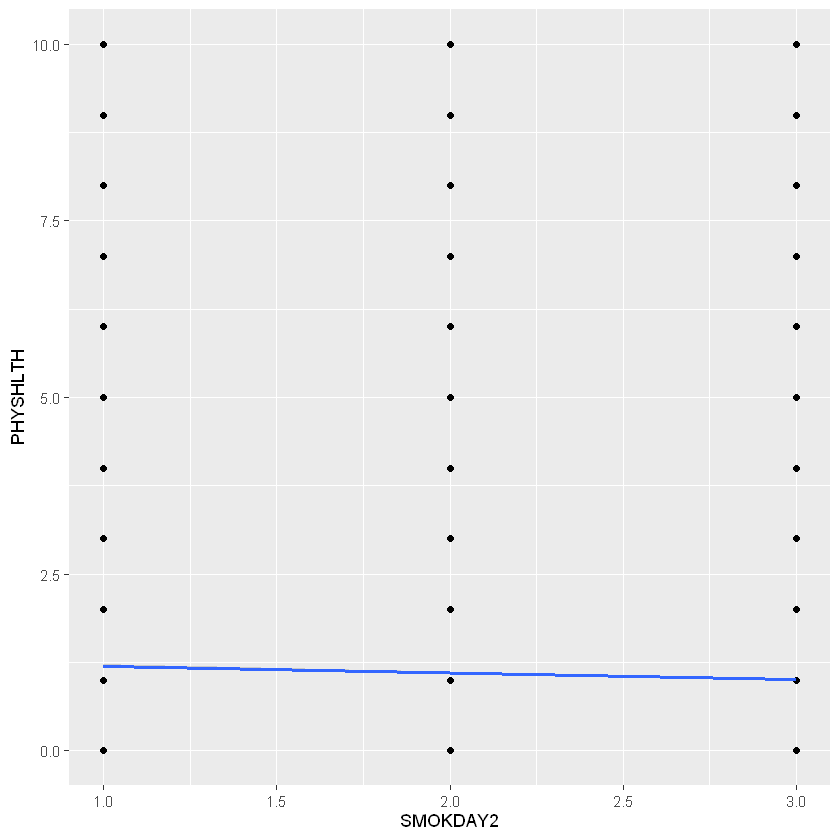

In [17]:
final_project_df |>
  ggplot(aes(x=SMOKDAY2, y=PHYSHLTH)) +
  geom_point() + geom_smooth(method = "lm")

they did not both have a negative relationship, but I wanted to see if my theory was correct or not. 
Although they both have a negative line of best fit, for the smoking plot the negative line of best fit shows that those who smoked less felt better (because the number 3 represents not smoking). The alcdrinkday line of best fit showed that having more drinks actually lead to less days feeling not well.


The first thing I wanted to visualize here was the counts of each of the variables. By running histograms on each variable I was quickly able to see that most participants did not drink or had less drinks daily, most participants felt good for most of the month, most participants did not smoke, and most participants engaged in physical exercise within the past 30 days. What I wanted to see next was the relationships with the predicted and predictor variables. I ran scatterplots with line of best fit in order to see if there were positive and negative relationships with the predicted variable. What I found was that the variable I expected to have a positive relationship did have one, and it does show that people who have not exercised tend to have more days feeling not well. The plot depicting smoking within the past 30 days does show a slight negative correlation, as those who never smoked were slightly healthier than those who smoked some or more. The plot depicting days feeling well and drinks per day did surprise me, as the graph shows those who drank had very slightly more days feeling well.

In [18]:
#using describe to see descriptive stats on all variables
#note alcday5 is still in the dataframe, I did not want to remove it for the sake of seeing how it would pan out. 
Q14 <- describe(final_project_df)

Q14

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PHYSHLTH,1,118494,1.0546948,2.3005477,0.00,0.42942740,0.000000,0,10.00,10.00,2.51382462,5.8191738,0.0066831784
SMOKDAY2,2,118494,2.4754756,0.8273542,3.00,2.59433942,0.000000,1,3.00,2.00,-1.07430983,-0.6777369,0.0024034954
ALCDAY5,3,118494,513.3466673,356.5110085,218.00,517.98349086,173.464200,101,888.00,787.00,0.08037268,-1.9539099,1.0356780325
EXERANY2,4,118494,1.2439195,0.4294466,1.00,1.17990211,0.000000,1,2.00,1.00,1.19259689,-0.5777175,0.0012475586
ALCDRINKDAY,5,118494,0.1215499,0.1838946,0.03,0.08028946,0.044478,0,0.71,0.71,1.71300535,2.0382922,0.0005342209


PHYSHLTH - For this variable, it is important to note the mean and median. Although the mean is 1.05, the median is 0. This indicates that there must have been a lot more entries just at the 0 value versus the other 30 possible entries. The skew of 2.51 would also indicate the most of the entered values would be towards the left, which checks out when plotted as a histogram. The mean to me also indicates that most people generally feel well most of the month but it feels more realistic than the 0 number the median generated which makes it seem more like everyone is always feeling good. The standard deviation in comparison to the mean is also showing that the data points are spread out.

SMOKDAY2 - For this variable, the median would indicate that the majority of people have not smoked within the past 30 days. The mean shows that on average the typical participant lies between non-smoking and smoking some. Our skew is now negative because most people are non-smoking which is actually now the highest value on our graph versus the lowest value as seen in our first variable. The standard deviation compared to our mean in this variable would indicated that the points are not spread out very widely.

ALCDAY5 - This column is basically a non-factor at this point as the data from this column was converted into more usable data by breaking it down to a per day basis in the ALCDRINKDAY column. All the values are higher in this column for two reasons. The first is I did not clean out the very high integer based answers that really did not mean anything (don’t know/not sure and refusal to answer) and I did not convert the very high integer of 888 which really means zero. Secondly, since the per week and per month basis started with an indicator of the value of 1 or 2, all of the values are pushed up much higher, which is why cleaning it and making it per day work outs much better.

ALCDRINKDAY - Similar to our first variable, the median is showing a median of zero drinks per day for the participants, while the mean is showing that on average a participant drinks about 0.11 of a drink a day. With 30 days in a month it translates to roughly 3 drinks within the past 30 days versus the median of 0 drinks in the past 30 days. This means that if we visualize the data as we did before, we should see a skew, and in this case based on the type of data entered it is a positive skew. The standard deviation versus the mean would indicate the data points are spread out relatively widely.

EXERANY2 - With only two options for an answer, this data is relatively easy to interpret. The median of 1 would indicate the majority of participants have exercised within the past 30 days, and with a mean that is also pretty close at a number of 1.29, it would support the idea that most participants have exercised within the past 30 days. The standard deviation would also indicate that the data points are not spread out much, which makes sense since there was only two options.

## Running Linear Regression Models

In [19]:
#creating factors for the exerany2 column and the smokeday2 columns
final_project_df$EXERANY2 <- factor(final_project_df$EXERANY2, levels = c(1,2))
#final_project_df$SMOKDAY2 <- factor(final_project_df$SMOKDAY2, levels = c(1,2,3))

#First LM and summary with EXERANY2
EXER_pred_lm <- lm(PHYSHLTH~ EXERANY2, data = final_project_df)
EXER_pred_summary<- summary(EXER_pred_lm)

#Second LM and summary with ALCDRINKDAY + SMOKDAY2
ALC_SMOKE_predictors_lm <- lm(PHYSHLTH ~ ALCDRINKDAY + SMOKDAY2, data = final_project_df)
ALC_SMOKE_summary <- summary(ALC_SMOKE_predictors_lm)

#Third LM and summary with ALCDRINKDAY + EXERANY2
SMOK_EXER_predictors_lm <- lm(PHYSHLTH ~ SMOKDAY2 + EXERANY2, data = final_project_df)
SMOK_EXER_pred_summary <- summary(SMOK_EXER_predictors_lm)

#Running summaries of the 3 Linear models
EXER_pred_summary


Call:
lm(formula = PHYSHLTH ~ EXERANY2, data = final_project_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3534 -0.9583 -0.9583 -0.3534  9.0417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.958344   0.007665  125.03   <2e-16 ***
EXERANY22   0.395010   0.015520   25.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.294 on 118492 degrees of freedom
Multiple R-squared:  0.005437,	Adjusted R-squared:  0.005429 
F-statistic: 647.8 on 1 and 118492 DF,  p-value: < 2.2e-16


In [20]:
ALC_SMOKE_summary


Call:
lm(formula = PHYSHLTH ~ ALCDRINKDAY + SMOKDAY2, data = final_project_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2398 -1.0613 -1.0306 -0.1782  9.2509 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.329054   0.021335   62.29   <2e-16 ***
ALCDRINKDAY -0.439773   0.036344  -12.10   <2e-16 ***
SMOKDAY2    -0.089237   0.008078  -11.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.298 on 118491 degrees of freedom
Multiple R-squared:  0.002378,	Adjusted R-squared:  0.002361 
F-statistic: 141.2 on 2 and 118491 DF,  p-value: < 2.2e-16


In [21]:
SMOK_EXER_pred_summary


Call:
lm(formula = PHYSHLTH ~ SMOKDAY2 + EXERANY2, data = final_project_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4511 -1.0707 -0.9232 -0.3036  9.0768 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.144495   0.021823   52.45   <2e-16 ***
SMOKDAY2    -0.073756   0.008096   -9.11   <2e-16 ***
EXERANY22    0.380377   0.015598   24.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.294 on 118491 degrees of freedom
Multiple R-squared:  0.006133,	Adjusted R-squared:  0.006117 
F-statistic: 365.6 on 2 and 118491 DF,  p-value: < 2.2e-16


## Running AIC on the models

In [22]:
#Running AIC for the 3 Linear models
AIC(EXER_pred_lm)

[1] 533076.3

In [23]:
AIC(ALC_SMOKE_predictors_lm)

[1] 533442.2

In [24]:
AIC(SMOK_EXER_predictors_lm)

[1] 532995.3

In [25]:
#Best Model
Q15 <- SMOK_EXER_predictors_lm

Q15


Call:
lm(formula = PHYSHLTH ~ SMOKDAY2 + EXERANY2, data = final_project_df)

Coefficients:
(Intercept)     SMOKDAY2    EXERANY22  
    1.14449     -0.07376      0.38038  


I ran 3 different linear models to determine amount of days feeling not well. The first model makes sense because it is adding time to the days not feeling well if you dont exercise. Not only does this logically make sense, but it supports what we saw with our correlation earlier in the scatterplot.

The second model is the worst model for various reasons. The first reason is it has the worst AIC when calculated. The second reason is that our alcdrinkday column is actually taking away time for days not feeling well instead of adding, so although the data supports this I know logically it does not make much sense.

The third model is the best for a few reasons. First off it has the best AIC. Secondly, when you carefully examine the data, the estimates make sense. So at first I tried to factor the smoking variable and although it produced logical results one of the factors was deemed non-significant. Now when ran it still makes sense when you think about what could be entered for the smoking variable. The answer of one is being used as the standard, with two and three being the other two answers. If you plug 2 into the equation, you get a positive number, hence you add days to feeling not well. If you plug 3 in (which equates to never smoking in the past thirty days) then it turns out to be negative, which would take days away from not feeling well. Also this model adds time for those who have no exercised within the past 30 days which also makes real world sense. In the end I don’t think any of the models work out great because the data was so skewed, but this one between logic and AIC makes me think it is the best one.